# Maple Syrup Exploratory Data Analysis

In [403]:
import numpy as np
import pandas as pd
maple_data = pd.read_csv("Downloads/maplemaple.csv")

In [404]:
import seaborn as sns
maple_data.head()
maple_data.shape
maple_data['Tree Name/GIS #'].value_counts()
maple_data.shape

(474, 13)

# Handling Volume of Sap Observed: Missing Values

Our group recorded "Vol of Sap Collected" as the volume of sap observed in the gallon. The function below does the following:
1. fill in the NA values of the tree to the previous value, i.e. if no one said anything, the amount of sap in the jug stayed the same.
2. compute the differences in sap observed each day, to obtain the vol of sap produced by the tree each day.

In [405]:
#trees as strings
maple_data['Tree Name/GIS #'] = (maple_data['Tree Name/GIS #']).astype(str)

#group the df by tree
grouped_df = maple_data.groupby('Tree Name/GIS #')


def fillin_get_differences(tree):
#fill NA values of the tree to the previous value. i.e. if no one said anything, the amount of sap in the jug stayed the same.
    new = grouped_df.get_group(tree)['Vol of Sap Collected (Gallons)'].fillna(method = 'ffill')
    new_float = new.astype(float)
    
    #getting differences
    differences = []
    old_indices = new_float.keys()
    series_to_list = list(new_float)
    for i in range(0, len(series_to_list)):
            # Calculate the difference between the current and previous values
            #Only if there was an increase in sap in the jug
            if series_to_list[i] > series_to_list[i-1]:
                diff = series_to_list[i] - series_to_list[i-1]
            # Append the difference to the list
                differences.append(diff)
            else: # otherwise, there was no increase.
                differences.append(0)
    new_series = pd.Series(differences, index = old_indices)#the correct indices and the new values of new sap produced! Only for tree 10

    return new_series
    

new1 = fillin_get_differences("10.0")
new2 = fillin_get_differences("4.0")
new3 = fillin_get_differences("4951.0")
new4 = fillin_get_differences("170.0")
new5 = fillin_get_differences("171.0")
new6 = fillin_get_differences("172.0")
new_list = []


new_series = pd.concat([new1, new2, new3, new4, new5, new6]).sort_index()
maple_data['Volume of Sap Produced'] = new_series

**Things to do** <br>
- Change "Day" to be a datetime type <br>
- Graph sap flow and day for the six different trees <br>
- Calculate total volume of sap... when the vol_sap drops, add the higher value <br>

# Converting "Day" to a continuous variable

In [433]:
#converting day to datetime, dropping some faulty rows

maple_data_gooddates = maple_data.loc[(maple_data['Day'].str.len() > 6) & (maple_data['Day'].str.len() < 12)]
maple_data_gooddates.shape


maple_data_gooddates = maple_data_gooddates.copy()

maple_data_gooddates['Day'] = pd.to_datetime(maple_data_gooddates['Day'])


#trees as type string
maple_data_gooddates['Tree Name/GIS #'] = (maple_data_gooddates['Tree Name/GIS #']).astype(str)
maple_data_gooddates['Raw Sap Gravity/Sugar Content'] = (maple_data_gooddates['Raw Sap Gravity/Sugar Content']).astype(float)
maple_data_gooddates['Sap Flow (Drops per minute)'] = (maple_data_gooddates['Sap Flow (Drops per minute)']).astype(float)
maple_data_gooddates['Ambient Temp (°F)'] = (maple_data_gooddates['Ambient Temp (°F)']).astype(float)

maple_data_gooddates.head()

,Day,Precipitation/Week,Ambient Temp (°F),Local Temp (°F),Regional Temp (°F),Tree Name/GIS #,Tap Set Date,Tap Removal Date,Sap Flow (Drops per minute),Vol of Sap Collected (Gallons),Raw Sap Gravity/Sugar Content,Soil Sample Y/N,Wildlife Observations,Volume of Sap Produced
0,2024-01-12,NaN,26.0,37.0,NaN,10.0,1/12,NaN,NaN,0.0,5.0,NaN,"tulip magnolia blooming, squirrels poking arou...",0.0
1,2024-01-12,NaN,26.0,37.0,NaN,4.0,1/12,NaN,NaN,0.0,NaN,NaN,NaN,0.0
2,2024-01-12,NaN,26.0,37.0,NaN,4951.0,1/12,NaN,NaN,0.0,NaN,NaN,NaN,0.0
3,2024-01-13,NaN,12.0,25.0,25.0,10.0,1/12,NaN,NaN,0.0,NaN,NaN,discovery of a microclimate on Chicago Ave. tr...,0.0
4,2024-01-13,NaN,12.0,25.0,25.0,4.0,1/12,NaN,NaN,0.0,NaN,NaN,NaN,0.0


# Volume of Sap

<Figure size 1200x1000 with 0 Axes>

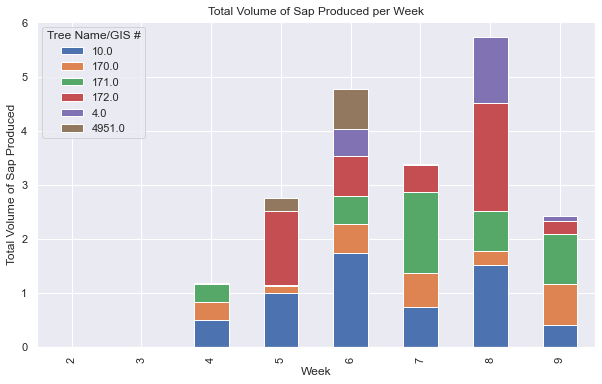

In [427]:
plt.figure(dpi=100)

maple_data_gooddates['Week'] = maple_data_gooddates['Day'].dt.isocalendar().week

grouped_df = maple_data_gooddates.groupby(['Week', 'Tree Name/GIS #']).agg({'Volume of Sap Produced': 'sum'}).unstack()

# Plotting the stacked bar chart
ax = grouped_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.xlabel('Week')
plt.ylabel('Total Volume of Sap Produced')
plt.title('Total Volume of Sap Produced per Week')
plt.legend(title='Tree Name/GIS #', labels=grouped_df.columns.levels[1], loc = 'upper left')

# Display the plot
plt.show()

<Figure size 1200x1000 with 0 Axes>

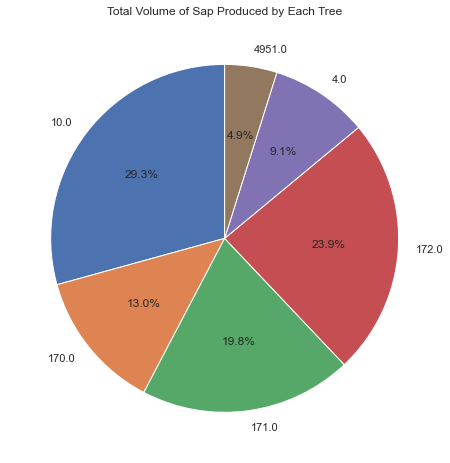

In [418]:
plt.figure(dpi=100)

# Group by 'Tree' and sum the 'Volume'
tree_totals = maple_data_gooddates.groupby('Tree Name/GIS #')['Volume of Sap Produced'].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(tree_totals, labels=tree_totals.index, autopct='%1.1f%%', startangle=90)

# Adding title
plt.title('Total Volume of Sap Produced by Each Tree')

# Display the pie chart
plt.show()

In [409]:
maple_data_gooddates['Volume of Sap Produced'].sum()

20.2506651

# Temperatures

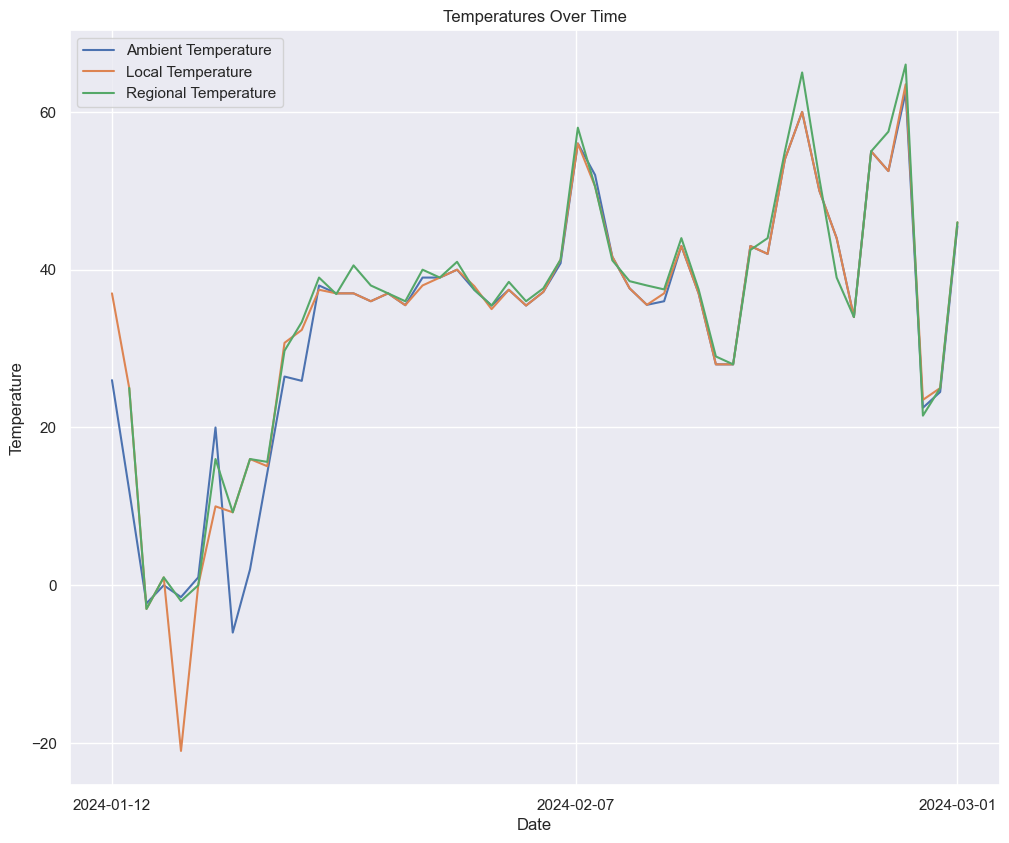

In [419]:
import matplotlib.pyplot as plt
plt.figure(dpi=100)

sns.lineplot(x='Day', y="Ambient Temp (°F)", label = "Ambient Temperature", data = maple_data_gooddates, ci = None)
sns.lineplot(x='Day', y="Local Temp (°F)", label = "Local Temperature", data = maple_data_gooddates, ci = None)
sns.lineplot(x='Day', y='Regional Temp (°F)', label = "Regional Temperature", data = maple_data_gooddates, ci = None)

# Show legend
plt.legend()
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperatures Over Time')

#x axis adjust
plt.xticks([maple_data_gooddates['Day'].min(), maple_data_gooddates['Day'].mean(), maple_data_gooddates['Day'].max()])

# Show the plot
plt.show()

# Sugar Content

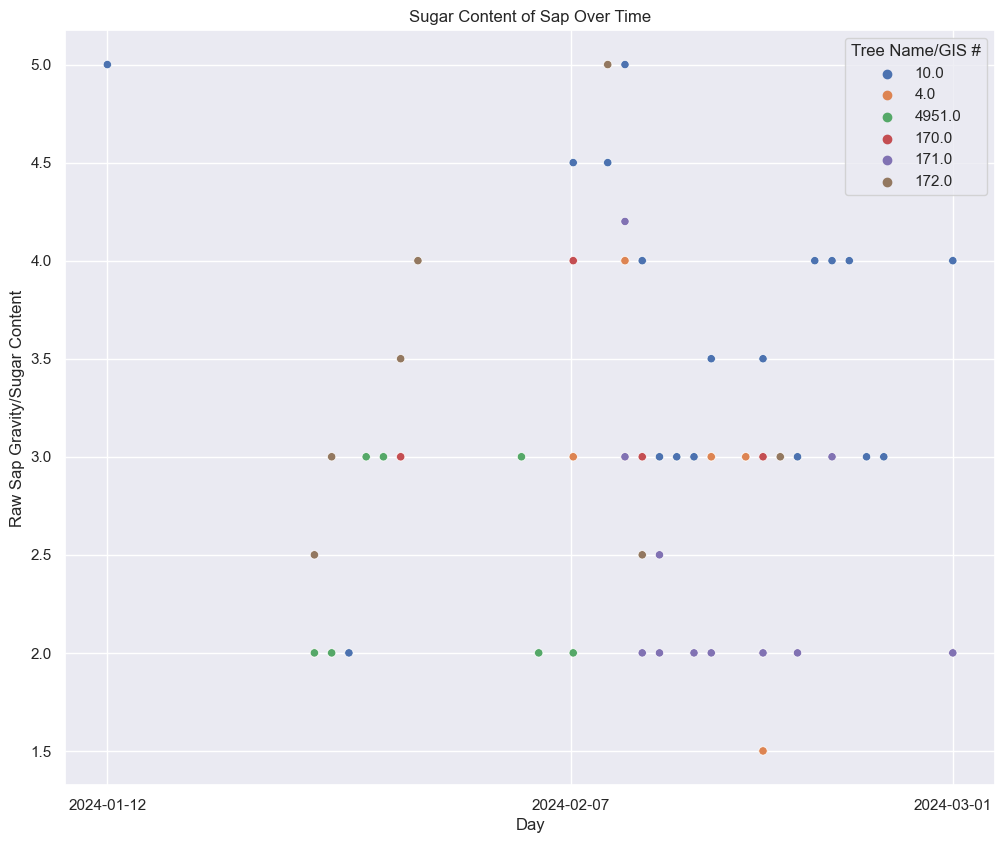

In [426]:
plt.figure(dpi=100)

sns.scatterplot(x='Day', y="Raw Sap Gravity/Sugar Content", hue = "Tree Name/GIS #", data = maple_data_gooddates, ci = None)

# Show legend
plt.legend(title = "Tree Name/GIS #")
#x axis adjust
plt.xticks([maple_data_gooddates['Day'].min(), maple_data_gooddates['Day'].mean(), maple_data_gooddates['Day'].max()])
plt.title('Sugar Content of Sap Over Time')

# Show the plot
plt.show()

<Figure size 1200x1000 with 0 Axes>

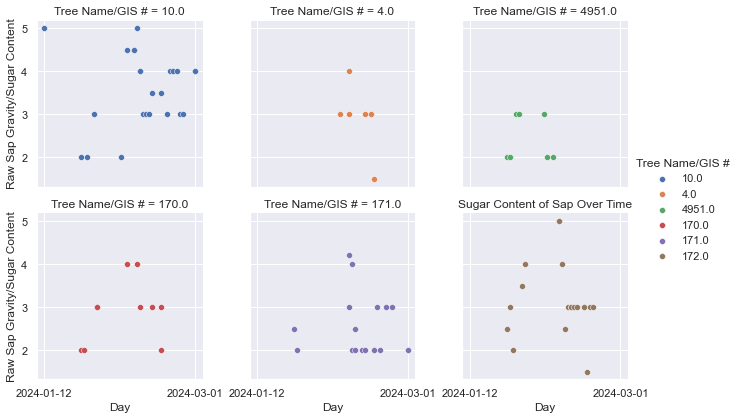

In [423]:
plt.figure(dpi=100)

a = sns.FacetGrid(maple_data_gooddates, hue='Tree Name/GIS #', col = 'Tree Name/GIS #',col_wrap=3,height=3,aspect = 1)
a.map(sns.scatterplot, "Day", 'Raw Sap Gravity/Sugar Content', ci=None)
a.set_axis_labels("Day", "Raw Sap Gravity/Sugar Content")
plt.xticks([maple_data_gooddates['Day'].min(),  maple_data_gooddates['Day'].max()])
plt.title('Sugar Content of Sap Over Time')

a.add_legend()

# Sap Flow (Drops Per Min)

<Figure size 1200x1000 with 0 Axes>

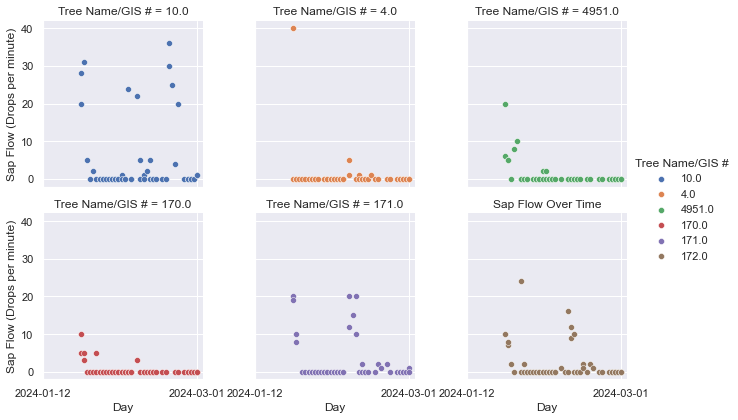

In [425]:
plt.figure(dpi=100)

a = sns.FacetGrid(maple_data_gooddates, hue='Tree Name/GIS #', col = 'Tree Name/GIS #',col_wrap=3,height=3,aspect = 1)
a.map(sns.scatterplot, "Day", 'Sap Flow (Drops per minute)', ci=None)
a.set_axis_labels("Day", "Sap Flow (Drops per minute)")
plt.xticks([maple_data_gooddates['Day'].min(),  maple_data_gooddates['Day'].max()])
plt.title('Sap Flow Over Time')

a.add_legend()

More Ideas <br>
- a pairplot <br>
- a simple linear regression...try to explain sap produced <br>
- temperature and volume of sap <br>
- line for each tree, volume of sap vs. time


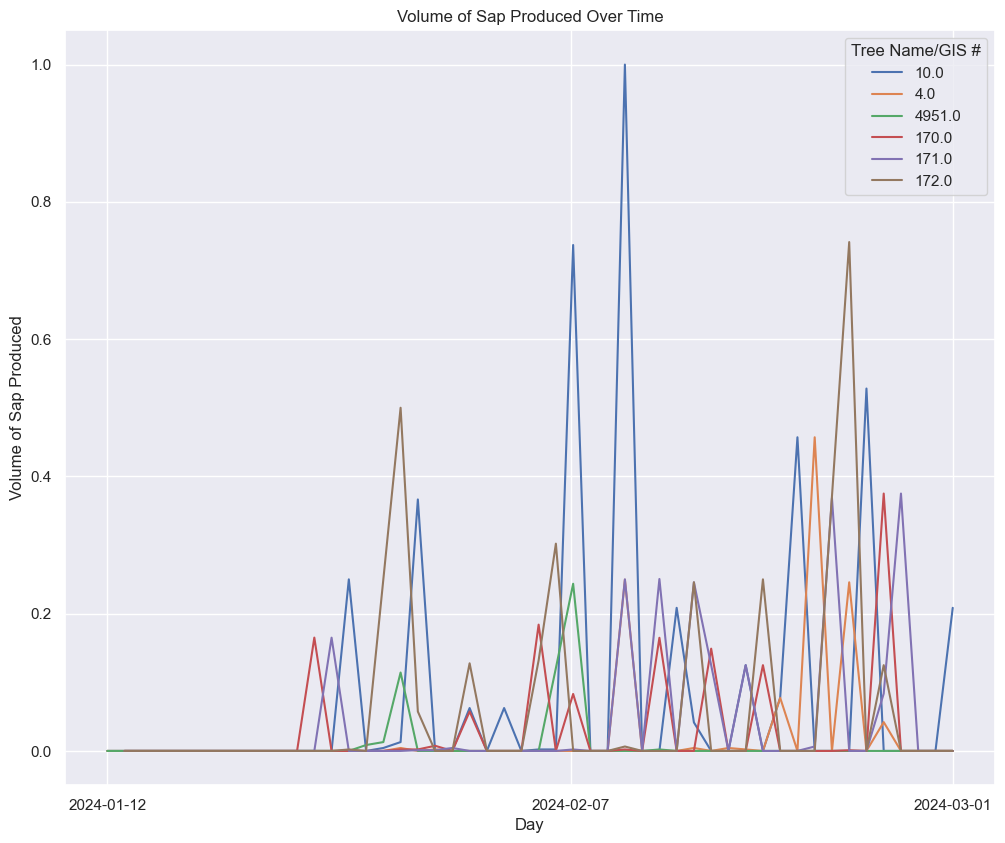

In [431]:
plt.figure(dpi=100)

sns.lineplot(x='Day', y="Volume of Sap Produced", hue = "Tree Name/GIS #", data = maple_data_gooddates, ci = None)

# Show legend
plt.legend(title = "Tree Name/GIS #")
#x axis adjust
plt.xticks([maple_data_gooddates['Day'].min(), maple_data_gooddates['Day'].mean(), maple_data_gooddates['Day'].max()])
plt.title('Volume of Sap Produced Over Time')

# Show the plot
plt.show()

# Correlations: Heatmap

<AxesSubplot:>

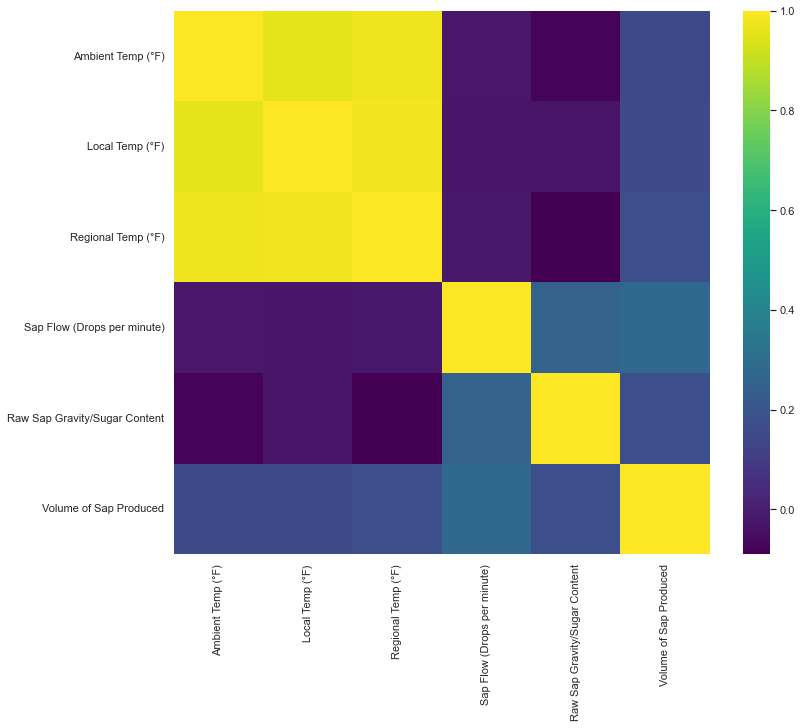

In [428]:
# day, all three temperatures, sap flow, sugar content, vol_sap_produced
selected_data = maple_data_gooddates.iloc[:, [0, 2,3, 4,8,10,13]]
custom_palette = sns.color_palette("viridis", as_cmap=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(selected_data.corr(), cmap = custom_palette)


# Correlations: Pairplot

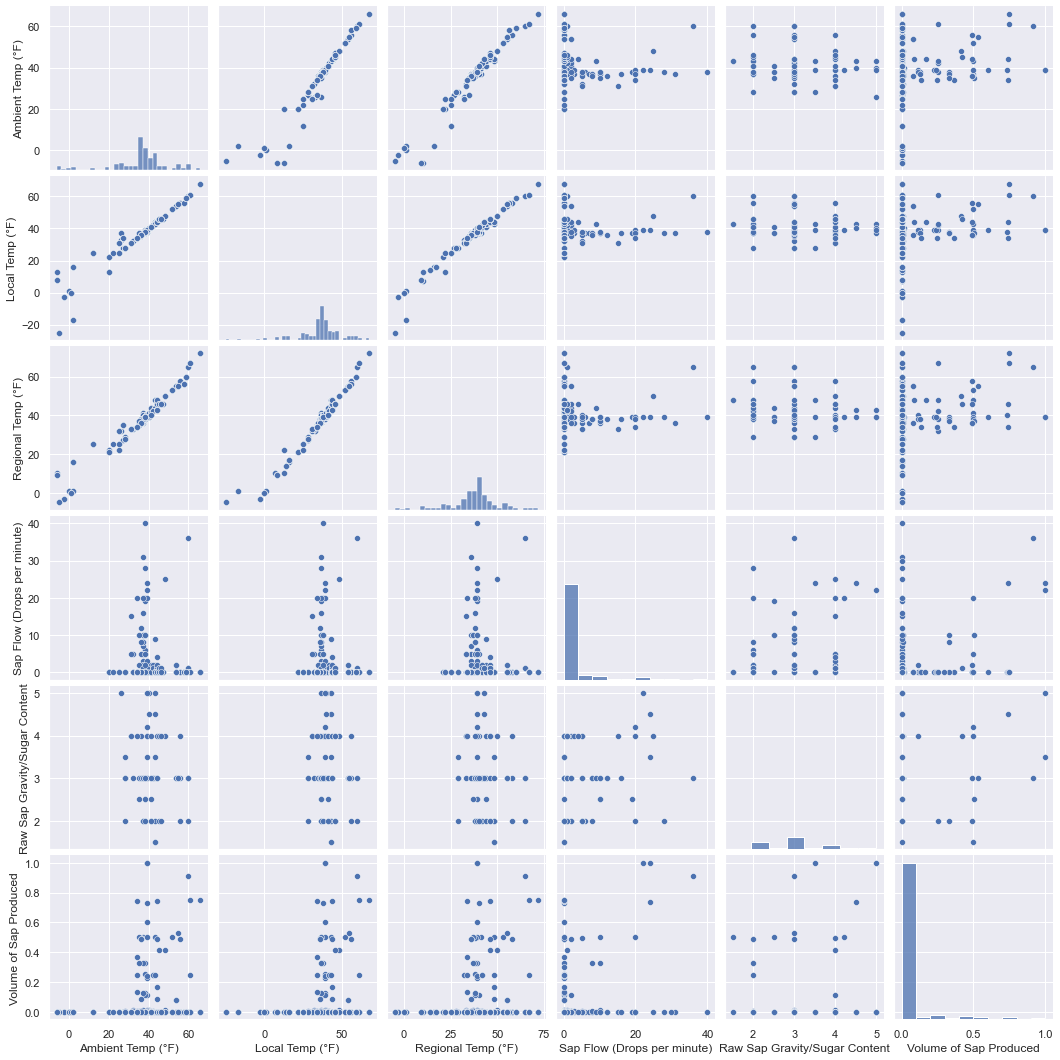

In [429]:
sns.pairplot(selected_data)